# Gulf of Guinea (toy)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from subprocess import check_call

from datetime import datetime
from pathlib import Path

import config
import cson_forge

## Define the grid

Specify the grid name and parameters defining its geometry and MPI domain decomposition.

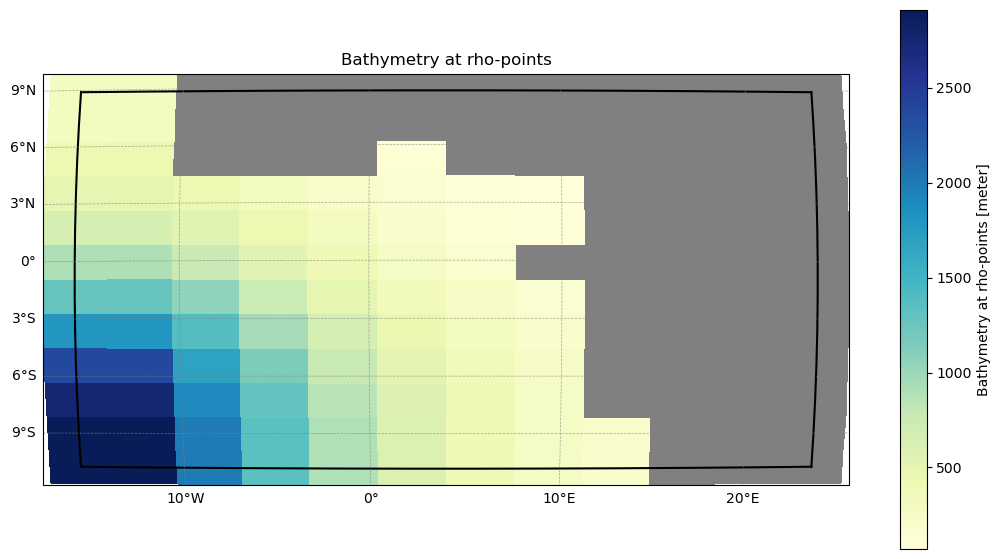

In [3]:
model_name = "roms-marbl"
grid_name = "gulf-guinea-toy"

start_time = datetime(2012, 1, 1)
end_time = datetime(2012, 1, 2)

boundaries={
        "south": True,
        "east": True,
        "north": True,
        "west": True, 
    }

np_eta = 5 # number of partitions in eta (y) 
np_xi = 2 # number of partitions in xi (x) 

grid_kwargs = dict(
    nx=10,           # number of grid points in x-direction
    ny=10,           # number of grid points in y-direction
    size_x=4000,       # domain size in x-direction (km)
    size_y=2000,       # domain size in y-direction (km)
    center_lon=4.0,    # center longitude (E)
    center_lat=-1.0,    # center latitude (S)
    rot=0,            # no rotation
    N=5,             # number of vertical layers
)

ocn = cson_forge.OcnModel(
    model_name=model_name,
    grid_name=grid_name,
    grid_kwargs=grid_kwargs,
    boundaries=boundaries,    
    start_time=start_time,
    end_time=end_time,
    np_eta=np_eta,
    np_xi=np_xi,
)
ocn.grid.plot()

In [4]:
ocn.prepare_source_data(clobber=False)

✔️  Using existing GLORYS_REGIONAL file for 2012-01-01: cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_gulf-guinea-toy_20120101.nc
✔️  Using existing GLORYS_REGIONAL file for 2012-01-02: cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_gulf-guinea-toy_20120102.nc
✔️  TPXO dataset verified at: /Users/mclong/cson-forge-data/source-data/TPXO/TPXO10.v2
✔️  Using existing BGC dataset: /Users/mclong/cson-forge-data/source-data/UNIFIED_BGC/BGCdataset.nc


In [5]:
inputs = ocn.generate_inputs(clobber=False)

⚠️  Found existing ROMS input files in /Users/mclong/cson-forge-data/input-data/roms-marbl_gulf-guinea-toy
    Not overwriting because clobber=False.

Exiting without changes.



### Quick look at some forcing

In [6]:
inputs["initial_conditions"].plot("DIC", s=-1)

KeyError: 'initial_conditions'

In [7]:
inputs["surface_forcing"].plot("uwnd", time=0)

KeyError: 'surface_forcing'

## Build the model

Apply templating to source code and input files, then build the model

In [23]:
parameters = {
    "param.opt": dict(NP_XI=np_xi, NP_ETA=np_eta, NX=ocn.grid.nx, NY=ocn.grid.ny, NK=ocn.grid.N),
    "river_frc.opt": dict(nriv=23), #inputs["rivers"].ds.sizes["nriver"]),
}

ocn.build(parameters, clean=True)

Build token: 20251211T003023Z-5775afc2
Building roms-marbl for grid: gulf-guinea-toy
roms-marbl opt_base_dir : /Users/mclong/codes/cson-forge/workflows/model-configs/opt_base/opt_base_roms-marbl-cson-default
ROMS opt_dir      : /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_gulf-guinea-toy/opt
ROMS build_dir    : /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_gulf-guinea-toy/bld
Input data path   : /Users/mclong/cson-forge-data/input-data/roms-marbl_gulf-guinea-toy
ROMS_ROOT         : /Users/mclong/cson-forge-data/codes/ucla-roms
MARBL_ROOT        : /Users/mclong/cson-forge-data/codes/MARBL
Conda env         : roms_env
Logs              : /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_gulf-guinea-toy/logs
ROMS repo already present at /Users/mclong/cson-forge-data/codes/ucla-roms
MARBL repo already present at /Users/mclong/cson-forge-data/codes/MARBL
Checking out MARBL marbl0.45.0
Conda env 'roms_env' already exists.
Using compiler kind: gnu
Found 1 e

PosixPath('/Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_gulf-guinea-toy/exe/roms-marbl-gulf-guinea-toy-20251211T003023Z-5775afc2')

In [21]:
ocn.run(case="test.001")

Copying settings input files from /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_gulf-guinea-toy/opt to /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_gulf-guinea-toy/test.001:
  roms.in -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_gulf-guinea-toy/test.001/roms.in
  marbl_in -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_gulf-guinea-toy/test.001/marbl_in
  marbl_tracer_output_list -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_gulf-guinea-toy/test.001/marbl_tracer_output_list
Rendering master settings file: roms.in


UndefinedError: 'GRID_PATH' is undefined